### pandas의 그룹화 기능을 사용한 데이터 분석 맛보기

2016 US Election 데이터셋 분석하기

In [1]:
%matplotlib nbagg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
primary = pd.read_csv("data/2016_presidential_election/primary_results.csv", sep=",")

In [3]:
counties = pd.read_csv("data/2016_presidential_election/county_facts.csv" , sep = ",")

In [4]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [5]:
counties.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [6]:
primary.columns

Index([u'state', u'state_abbreviation', u'county', u'fips', u'party',
       u'candidate', u'votes', u'fraction_votes'],
      dtype='object')

In [7]:
counties.columns

Index([u'fips', u'area_name', u'state_abbreviation', u'PST045214',
       u'PST040210', u'PST120214', u'POP010210', u'AGE135214', u'AGE295214',
       u'AGE775214', u'SEX255214', u'RHI125214', u'RHI225214', u'RHI325214',
       u'RHI425214', u'RHI525214', u'RHI625214', u'RHI725214', u'RHI825214',
       u'POP715213', u'POP645213', u'POP815213', u'EDU635213', u'EDU685213',
       u'VET605213', u'LFE305213', u'HSG010214', u'HSG445213', u'HSG096213',
       u'HSG495213', u'HSD410213', u'HSD310213', u'INC910213', u'INC110213',
       u'PVY020213', u'BZA010213', u'BZA110213', u'BZA115213', u'NES010213',
       u'SBO001207', u'SBO315207', u'SBO115207', u'SBO215207', u'SBO515207',
       u'SBO415207', u'SBO015207', u'MAN450207', u'WTN220207', u'RTN130207',
       u'RTN131207', u'AFN120207', u'BPS030214', u'LND110210', u'POP060210'],
      dtype='object')

In [8]:
counties.shape

(3195, 54)

In [9]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [10]:
# 각 후보별 전체 득표수 계산하기
primary["candidate"].unique()

array(['Donald Trump', 'Ted Cruz', 'Marco Rubio', 'Ben Carson',
       'John Kasich', 'Hillary Clinton', 'Bernie Sanders', 'Carly Fiorina',
       'Rand Paul', 'Mike Huckabee', 'Rick Santorum', 'Jeb Bush',
       'Chris Christie', "Martin O'Malley", ' Uncommitted',
       ' No Preference'], dtype=object)

In [11]:
primary.groupby("candidate")["votes"].sum()

candidate
 No Preference         313
 Uncommitted            43
Ben Carson          528463
Bernie Sanders     4740278
Carly Fiorina        15181
Chris Christie       24347
Donald Trump       6944654
Hillary Clinton    7178257
Jeb Bush             94394
John Kasich        2456406
Marco Rubio        2998335
Martin O'Malley        747
Mike Huckabee         3300
Rand Paul             8460
Rick Santorum         1773
Ted Cruz           5248807
Name: votes, dtype: int64

In [12]:
# 오름차순 정렬
candidate_to_votes_s = primary.groupby("candidate")["votes"].sum().sort_values()

In [13]:
candidate_to_votes_s

candidate
 Uncommitted            43
 No Preference         313
Martin O'Malley        747
Rick Santorum         1773
Mike Huckabee         3300
Rand Paul             8460
Carly Fiorina        15181
Chris Christie       24347
Jeb Bush             94394
Ben Carson          528463
John Kasich        2456406
Marco Rubio        2998335
Bernie Sanders     4740278
Ted Cruz           5248807
Donald Trump       6944654
Hillary Clinton    7178257
Name: votes, dtype: int64

<IPython.core.display.Javascript object>


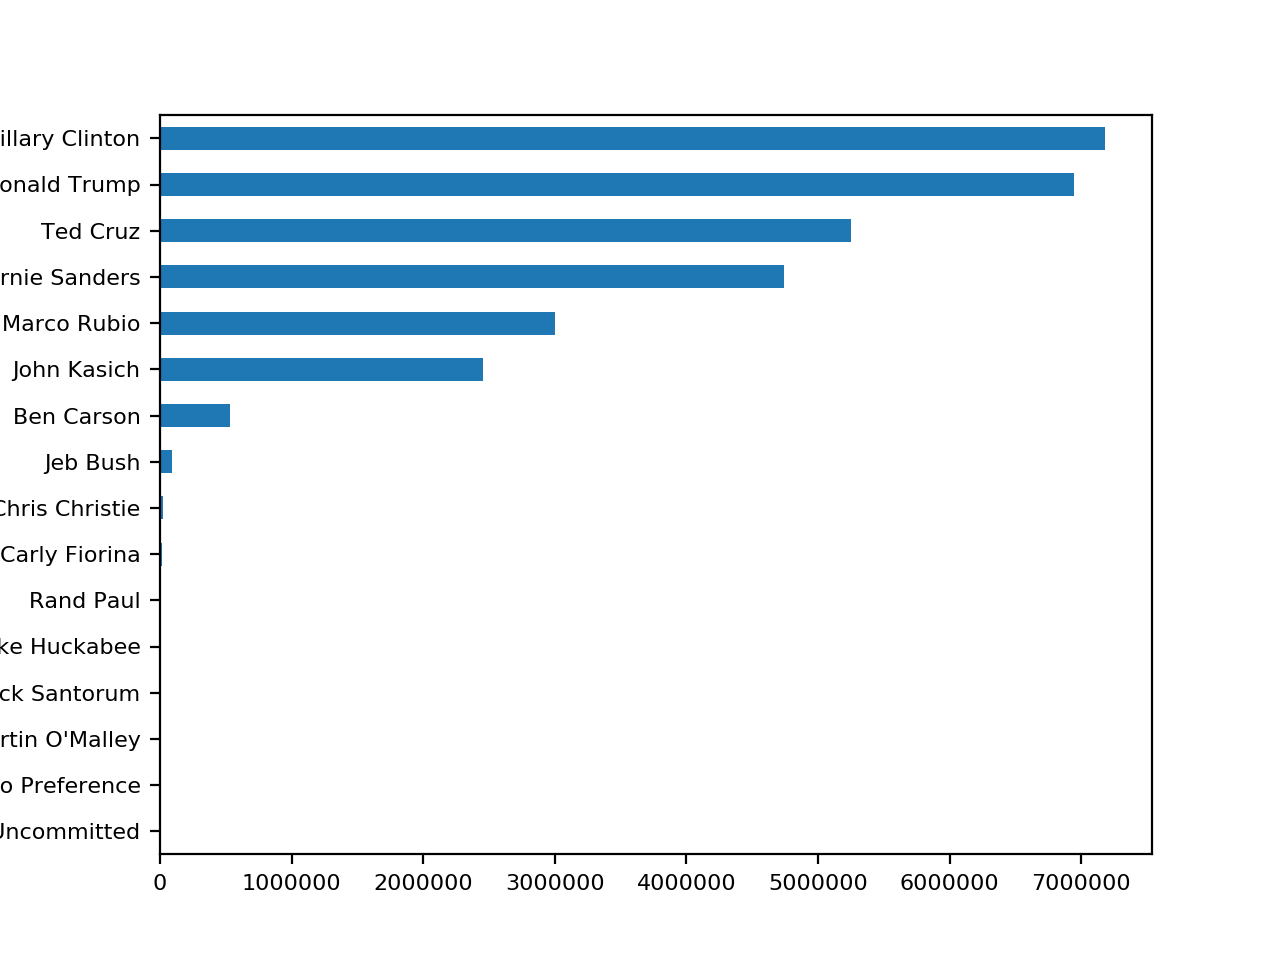

In [14]:
candidate_to_votes_s.plot(kind="barh", fontsize=8)

In [15]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [16]:
# 각 주별 , 각 정당의 득표 비율 계산하기
state_party_to_votes_s = primary.groupby(["state","party"])["votes"].sum()

In [17]:
state_party_to_votes_s.head()

state     party     
Alabama   Democrat      381810
          Republican    805814
Arizona   Democrat      399097
          Republican    435103
Arkansas  Democrat      207182
Name: votes, dtype: int64

In [18]:
state_to_votes_s = primary.groupby("state")["votes"].sum()

In [19]:
state_to_votes_s.head()

state
Alabama     1187624
Arizona      834200
Arkansas     602290
Colorado     121184
Florida     3767915
Name: votes, dtype: int64

In [20]:
state_party_to_vote_pcts_s = state_party_to_votes_s / state_to_votes_s

In [21]:
state_party_to_vote_pcts_s.head()

state     party     
Alabama   Democrat      0.321491
          Republican    0.678509
Arizona   Democrat      0.478419
          Republican    0.521581
Arkansas  Democrat      0.343990
Name: votes, dtype: float64

<IPython.core.display.Javascript object>


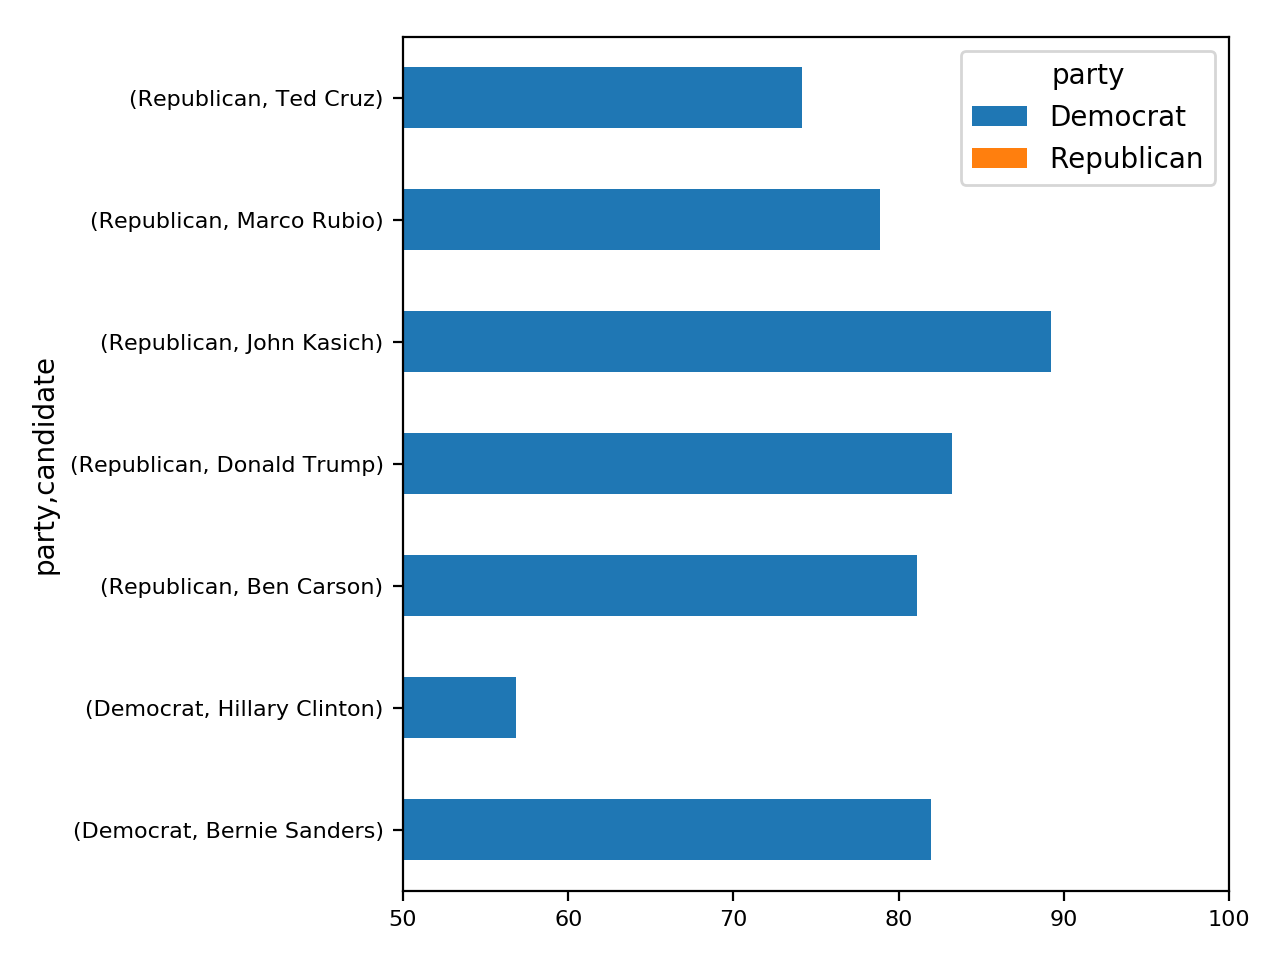

In [22]:
state_party_to_vote_pcts_s.unstack().plot(kind="barh", stacked=True,fontsize=8)

In [23]:
# agg_df는 각각의 그룹화된 결과물 을 명시하는 람다함수의 변수
func = lambda agg_df : agg_df.sort_values("votes", ascending=False).iloc[0]

In [24]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [25]:
# figs는 county를 나타내는 코드
winners = primary.groupby("fips").agg(func)

In [26]:
winners.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445
1003,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469
1005,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906
1007,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494
1009,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487


In [27]:
counties.columns

Index([u'fips', u'area_name', u'state_abbreviation', u'PST045214',
       u'PST040210', u'PST120214', u'POP010210', u'AGE135214', u'AGE295214',
       u'AGE775214', u'SEX255214', u'RHI125214', u'RHI225214', u'RHI325214',
       u'RHI425214', u'RHI525214', u'RHI625214', u'RHI725214', u'RHI825214',
       u'POP715213', u'POP645213', u'POP815213', u'EDU635213', u'EDU685213',
       u'VET605213', u'LFE305213', u'HSG010214', u'HSG445213', u'HSG096213',
       u'HSG495213', u'HSD410213', u'HSD310213', u'INC910213', u'INC110213',
       u'PVY020213', u'BZA010213', u'BZA110213', u'BZA115213', u'NES010213',
       u'SBO001207', u'SBO315207', u'SBO115207', u'SBO215207', u'SBO515207',
       u'SBO415207', u'SBO015207', u'MAN450207', u'WTN220207', u'RTN130207',
       u'RTN131207', u'AFN120207', u'BPS030214', u'LND110210', u'POP060210'],
      dtype='object')

In [28]:
counties["RHI825214"].head()

0    62.1
1    66.2
2    75.6
3    83.0
4    46.6
Name: RHI825214, dtype: float64

In [29]:
winners.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445
1003,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469
1005,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906
1007,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494
1009,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487


In [30]:
winners_county_races = pd.merge(winners,counties[["fips","RHI825214"]],
        left_index=True, right_on="fips", how="left")

In [31]:
winners_county_races.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,RHI825214
2,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,1001,75.6
3,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,1003,83.0
4,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005,46.6
5,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,1007,74.5
6,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,1009,87.8


In [32]:
winners_county_races = winners_county_races.rename(columns={"RHI825214" : "white_pcts"})
winners_county_white_pcts = winners_county_races.groupby(["party", "candidate"])["white_pcts"].mean()

In [33]:
winners_county_races.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,white_pcts
2,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,1001,75.6
3,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,1003,83.0
4,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005,46.6
5,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,1007,74.5
6,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,1009,87.8


In [34]:
winners_county_white_pcts = winners_county_races.groupby(["party","candidate"])["white_pcts"].mean()

In [35]:
winners_county_white_pcts.head()

party       candidate      
Democrat    Bernie Sanders     81.944030
            Hillary Clinton    56.856920
Republican  Ben Carson         81.100000
            Donald Trump       83.235638
            John Kasich        89.226415
Name: white_pcts, dtype: float64

In [36]:
ax = winners_county_white_pcts.plot(kind="barh",fontsize=8)

In [37]:
ax.set_xlim([50,100])

(50, 100)

In [38]:
plt.tight_layout()

In [ ]:
# 피벗 테이블 (pivot table)
# 데이터셋에 대하여 그룹화에 기반한 통계량을 계산하는 작업이 더 편리해짐

In [40]:
# values : 통계량을 계산할 열 , index와 column인자는 각각 그 값을 피벗 테이블의 인덱스와 컬럼으로 사용할 열, aggfunc : 적용할 통계 함수
total_votes = primary.pivot_table(values="votes",index="state", columns= "candidate", aggfunc="sum", fill_value=0)

In [41]:
total_votes

candidate,No Preference,Uncommitted,Ben Carson,Bernie Sanders,Carly Fiorina,Chris Christie,Donald Trump,Hillary Clinton,Jeb Bush,John Kasich,Marco Rubio,Martin O'Malley,Mike Huckabee,Rand Paul,Rick Santorum,Ted Cruz
state,,,,,,,,,,,,,,,,
Alabama,0,0,84139,74987,0,0,356892,306823,0,37127,154379,0,0,0,0,173277
Arizona,0,0,0,163400,0,0,249916,235697,0,53040,0,0,0,0,0,132147
Arkansas,0,0,23105,64514,0,0,132546,142668,0,15079,100999,0,0,0,0,123379
Colorado,0,0,0,71928,0,0,0,49256,0,0,0,0,0,0,0,0
Florida,0,0,0,547051,0,0,1015451,1064566,0,150167,607491,0,0,0,0,383189
Georgia,0,0,78731,181760,0,0,490566,460660,0,66740,297748,0,0,0,0,298304
Idaho,0,0,0,18550,0,0,60810,5017,0,16251,34976,0,0,0,0,99447
Illinois,0,0,0,354344,0,0,350991,304632,0,153761,72233,0,0,0,0,304903
Iowa,0,43,17173,69311,3475,3278,45163,69581,5221,3466,42883,747,3300,8460,1773,51316


In [47]:
primary.pivot_table(values="fraction_votes", index="state_abbreviation", 
                    columns="party", aggfunc="mean")

party,Democrat,Republican
state_abbreviation,,
AL,0.476823,0.195277
AR,0.464784,0.191924
AZ,0.478433,0.283867
CO,0.481016,NaN
FL,0.469349,0.242413
GA,0.493525,0.196939
IA,0.250003,0.090857
ID,0.494733,0.240773
IL,0.489632,0.242013
